In [19]:
#% means magic import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#seaborn wraps matlab up
import seaborn as sns
#set default params
sns.set();

In [2]:
df = pd.read_excel("../data/coalpublic2013.xls", header=2, index_col='MSHA ID')
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [3]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary', 'Contractor'], dtype=object)

In [4]:
#data quality issue 'Indepe{n}dent'
df['Company Type'].replace(to_replace='Indepedent Producer Operator',
                           value='Independent Producer Operator',
                           inplace=True).head()
#without inplace, have not changed data source

AttributeError: 'NoneType' object has no attribute 'head'

In [5]:
#rename all spaces in column names to _
df.rename(columns=lambda x:x.replace(" ","_"),inplace=True)
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [6]:
len(df)

1450

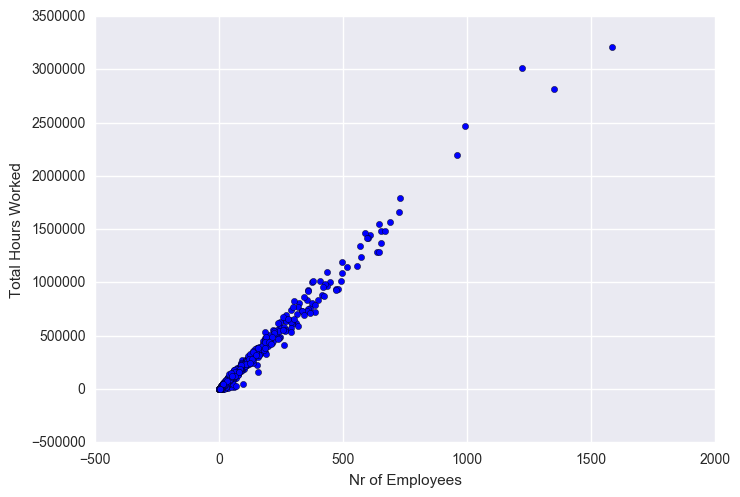

In [7]:
plt.scatter(df.Average_Employees,df['Labor_Hours'])
plt.xlabel("Nr of Employees")
plt.ylabel("Total Hours Worked")

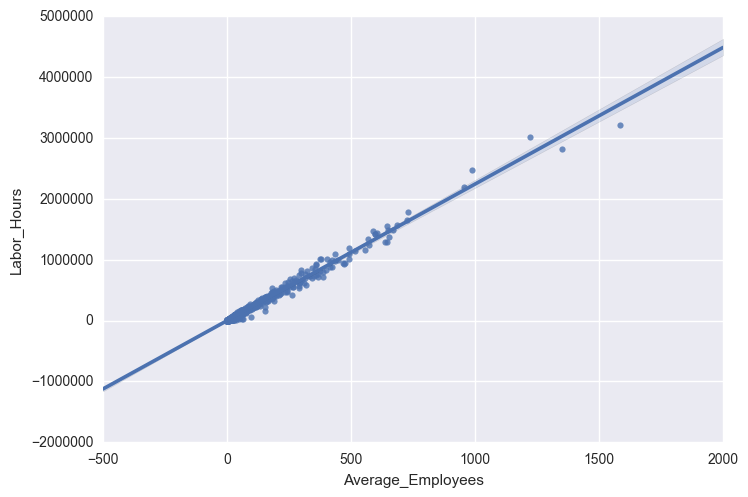

In [8]:
#regression plot
sns.regplot(df.Average_Employees,df.Labor_Hours)
#save figure
plt.savefig("../figures/YYYY-MM-DD" + "_employees_vs_hours.png")

In [9]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


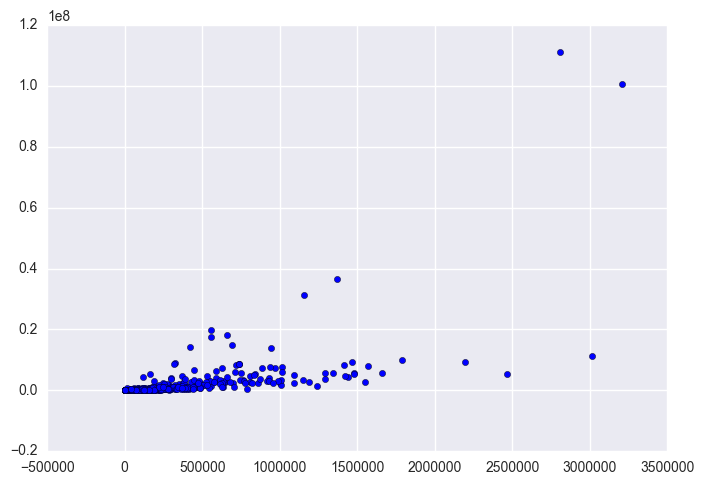

In [10]:
plt.scatter(df.Labor_Hours, df['Production_(short_tons)'])

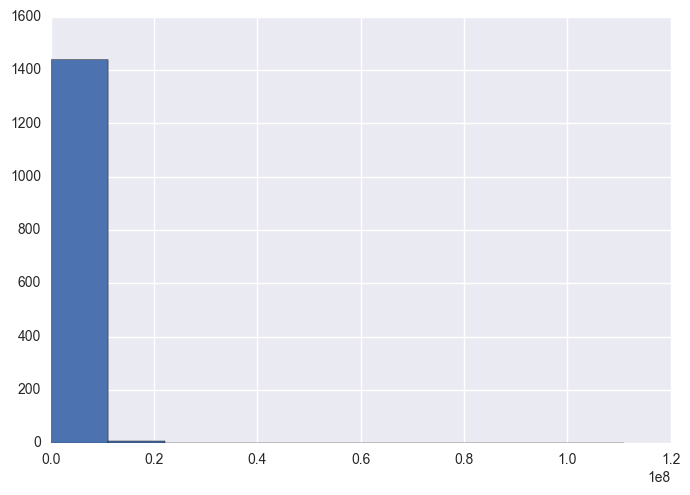

In [11]:
df['Production_(short_tons)'].hist()

In [12]:
min(df['Production_(short_tons)'])

0

In [13]:
len(df['Production_(short_tons)'])

1450

In [14]:
df['Production_(short_tons)'] == 0

MSHA ID
103381     False
103404     False
100759     False
103246     False
103451     False
103433     False
100329      True
100851     False
102901      True
102901     False
103180     False
103182     False
103285     False
103332     False
103375     False
103419     False
103432     False
103437     False
102976      True
102976      True
103380      True
103380      True
103422     False
103467     False
101247     False
101401     False
103172     False
103179     False
103303     False
103323     False
           ...  
4801646    False
3304389    False
4407113    False
1100588    False
4605995    False
3608690    False
3608728    False
3609442    False
3603561    False
1518888    False
1519402    False
1519522    False
3604969    False
1519554    False
1519674    False
3608822    False
3609843    False
3610027    False
3609304    False
3609406    False
3609405    False
100515     False
3609337    False
1518401    False
1519713    False
1103254    False
1102636    False
440723

In [15]:
df[df['Production_(short_tons)']==0]

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
100329,2013,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",UNIT,Appalachia Southern,0,59,144002
102901,2013,Shoal Creek Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine and Preparation Plant,Drummond Company Inc,"P.O. Box 1549, Jasper, AL 35501",United Mine Workers of America,Appalachia Southern,0,5,12396
102976,2013,Piney Woods Preparation Plant,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,0,5,14828
102976,2013,Piney Woods Preparation Plant,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,0,9,23193
103380,2013,Calera,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",,Appalachia Southern,0,6,12621
103380,2013,Calera,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",,Appalachia Southern,0,1,1402
103364,2013,Brc Alabama No. 7 Llc,Alabama,Tuscaloosa,Active,Underground,Independent Producer Operator,Preparation Plant,Brc Alabama No. 7 Llc,"P.O. Box 157, Brookwood, AL 35444",,Appalachia Southern,0,12,14324
103155,2013,Corinth Prep Plant,Alabama,Walker,Active,Surface,Independent Producer Operator,Preparation Plant,Warrior Investment Company Inc,"218 Highway 195, Jasper, AL 35503",,Appalachia Southern,0,12,27996
103155,2013,Corinth Prep Plant,Alabama,Walker,Active,Underground,Independent Producer Operator,Preparation Plant,Warrior Investment Company Inc,"218 Highway 195, Jasper, AL 35503",,Appalachia Southern,0,22,51994


In [16]:
df[df['Production_(short_tons)']>0]

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393
103433,2013,Crane Central Mine,Alabama,Jackson,Temporarily closed,Surface,Independent Producer Operator,Mine only,Alabama Carbon Llc,"5957 Windswept Blvd, Wise, VA 24293",,Appalachia Southern,69339,27,47195
100851,2013,Oak Grove Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Mine only,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",UNIT,Appalachia Southern,2269014,447,1001809
102901,2013,Shoal Creek Mine,Alabama,Jefferson,Active,Underground,Independent Producer Operator,Mine and Preparation Plant,Drummond Company Inc,"P.O. Box 1549, Jasper, AL 35501",United Mine Workers of America,Appalachia Southern,1453024,571,1237415
103180,2013,Sloan Mountain Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine only,"M S & R Equipment Company, Inc","2600 Warrior Jasper Road, Warrior, AL 35180",,Appalachia Southern,327780,84,196963


In [17]:
#Start to remove data from this point on
df = df[df['Production_(short_tons)']>0]

In [18]:
#original len: 1450
len(df)

1061

In [20]:
#create new col
df['log_production'] = np.log(df['Production_(short_tons)'])

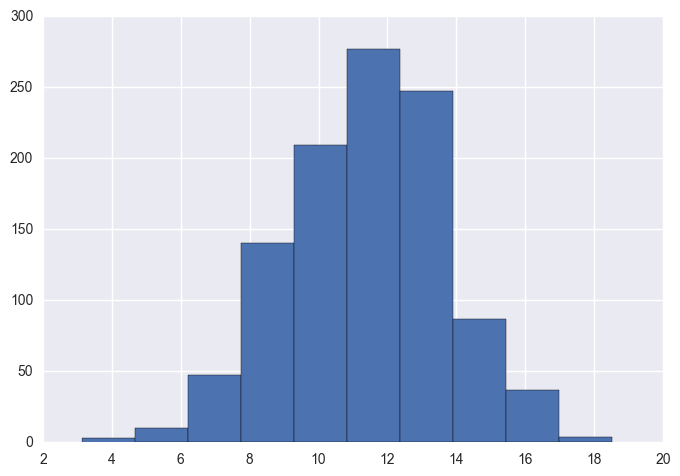

In [21]:
df.log_production.hist()

In [22]:
df.to_csv("../data/cleaned_coal_data.csv")